In [1]:
import matplotlib.pyplot as plt
from stochax import GeometricBrownianMotion

<Axes: >

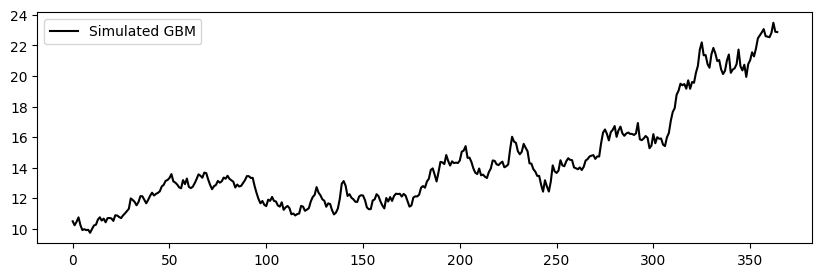

In [2]:
gbm = GeometricBrownianMotion(mu=1.0, sigma=0.5, rng=42)
dt = 1 / 365
initial_value = 10.5
n_steps = 364

data = gbm.simulate(initial_value=initial_value, n_steps=n_steps, delta=dt)
data.columns = ['Simulated GBM']
data.plot(figsize=(10, 3), color='black')

In [3]:
res = gbm.calibrate(data, method="mle", delta=dt)
res

CalibrationResult(GeometricBrownianMotion(mu=0.8917392277557253, sigma=0.47065000323010625), observations.shape=(365, 1))

In [4]:
simulations = gbm.simulate(initial_value=initial_value, n_steps=n_steps, delta=dt, n_simulations=1000)

<Axes: >

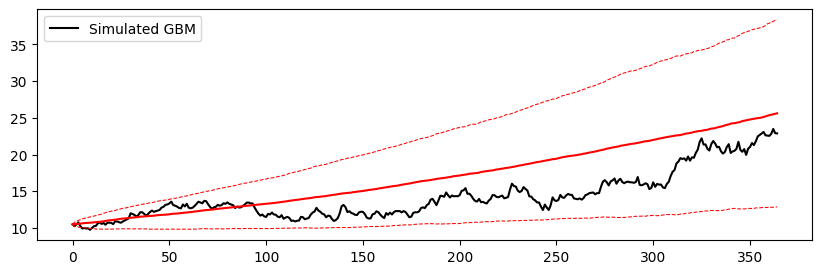

In [5]:
m = simulations.mean(axis=1)
s = simulations.std(axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
data.plot(color='black', ax=ax)
m.plot(color='red', ax=ax)
(m + s).plot(color='red', linestyle='dashed', linewidth=0.75)
(m - s).plot(color='red', linestyle='dashed', linewidth=0.75)